## Assignment 2: Overfitting using Higher Order Linear Regression

### Name:- Nishank Gujar
### UTA ID:- 1001861756

<b><u>References</u></b>
<b><div class="alert-success"> Green :- My Contribution </div>
<div class="alert-danger"> Red :- CSE-5334-Data Mining"Gradient Descent.pdf" </div>
<div class="alert-warning"> Yellow :- IBM "https://www.ibm.com/cloud/learn/overfitting" "https://www.ibm.com/cloud/learn/underfitting" </div>
<div class="alert-info"> Blue :- TBD </div>

### Overfitting
<div class="alert-warning"> <b>Overfitting</b> is a concept in data science, which occurs when a statistical model fits exactly against its training data.<br>
When the model memorizes the noise and fits too closely to the training set, the model becomes <b>overfitted</b>, and it is unable to generalize well to new data.</div> 

### Underfitting
<div class="alert-warning"> <b>Underfitting</b> is a scenario in data science where a data model is unable to capture the relationship between the input and output variables accurately, generating a high error rate on both the training set and unseen data..</div> 

### Overfitting V/S Underfitting
<div class="alert-warning"> If overtraining or model complexity results in <b>overfitting</b>, then a logical prevention response would be either to pause training process earlier, also known as, “early stopping” or to reduce complexity in the model by eliminating less relevant inputs. However, if you pause too early or exclude too many important features, you may encounter the opposite problem, and instead, you may <b>underfit</b> your model. <b>Underfitting</b> occurs when the model has not trained for enough time or the input variables are not significant enough to determine a meaningful relationship between the input and output variables.</div><br>
<center><img src="https://1.cms.s81c.com/sites/default/files/2021-03-03/model-over-fitting.png"></center>

<div class="alert-warning">In both scenarios, the model cannot establish the dominant trend within the training dataset. As a result, <b>underfitting</b> also generalizes poorly to unseen data. However, unlike <b>overfitting</b>, <b>underfitted</b> models experience high bias and less variance within their predictions. This illustrates the bias-variance tradeoff, which occurs when as an <b>underfitted</b> model shifted to an <b>overfitted</b> state. As the model learns, its bias reduces, but it can increase in variance as becomes <b>overfitted</b>. When fitting a model, the goal is to find the <b>“sweet spot”</b> in between <b>underfitting</b> and <b>overfitting</b>, so that it can establish a dominant trend and apply it broadly to new datasets.</div><br>
<center><img src="https://1.cms.s81c.com/sites/default/files/2021-03-03/classic%20overfitting_0.jpg"></center>

<b><div class="alert-success"> Libraries numpy and pandas are imported as np and pd. <br>
 Library matplotlib is imported to plot graphs and scatterplots.</div> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<b><div class="alert-success"> We Generate 20 data pairs (X, Y) using y = sin(2*pi*X) + 0.1 * N .<br>
 Using Normal Gaussian Distribution, we normalize the weights using random noise.<br>
    The Values of Noise, X data and Y data are being printed below.</div>

In [2]:
size = 10
x_data = np.linspace(0, 1, size)
noise = np.random.normal(0,0.1,size)
y_data = np.sin(x_data * 2 * np.pi) + 0.1 * noise

X_test = x_data[0::2]
X_train = x_data[1::2]
Y_test = y_data[0::2]
Y_train = y_data[1::2]

n = len(X_train)

print("Noise \n",noise)
print("X data \n",x_data)
print("Y data \n",y_data)

Noise 
 [ 0.1042381   0.17585411  0.04885432  0.02204849  0.005079    0.16966455
 -0.06668119 -0.05255888  0.0135676   0.13102552]
X data 
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
Y data 
 [ 0.01042381  0.66037302  0.98969319  0.86823025  0.34252804 -0.32505369
 -0.87269352 -0.99006364 -0.64143085  0.01310255]


<b><div class="alert-success"> The flow of data after normalizing it is shown below using scatterplot and a line passing through them.</div>

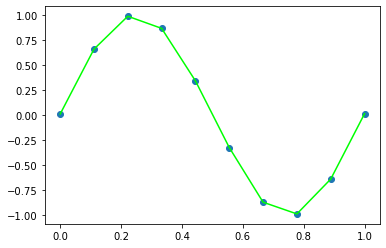

In [3]:
plot1 = plt.scatter(x_data, y_data)
plt.plot(x_data, y_data, color='lime')
plt.show()

<b><div class="alert-danger"> Model for forward passing in gradient descent. </div>

In [4]:
def forward(x):
  return x * w

<b><div class="alert-danger"> Loss function in gradient descent. </div>

In [5]:
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

<b><div class="alert-success"> Compute gradient using <i>d.loss/d.w=((y-xw)^2)/n</i> </div>

In [6]:
def gradient(x, y):
  return ((y-x*w)**2)/n

<b><div class="alert-success"> Using gradient descent, we generate weight and loss of each learning iteration.</div>

In [7]:
w = 0
weights = []
grado = []

for epoch in range(size):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        l = loss(x_val, y_val)
    print("progress:", epoch, "w=", w, "loss=", l)
    weights.append(w)  
    grado.append(grad)

progress: 0 w= -0.009046727930964182 loss= 0.0004905905969798
progress: 1 w= -0.01804590959664679 loss= 0.0009702266535369899
progress: 2 w= -0.026998931479034226 loss= 0.0016081289691074249
progress: 3 w= -0.035907155415099284 loss= 0.0024019514109998295
progress: 4 w= -0.04477191949661211 loss= 0.0033494544393051725
progress: 5 w= -0.05359453894193614 loss= 0.004448501926625242
progress: 6 w= -0.06237630694107616 loss= 0.005697058131778816
progress: 7 w= -0.0711184954751898 loss= 0.007093184820781725
progress: 8 w= -0.07982235611172073 loss= 0.008635038528774654
progress: 9 w= -0.08848912077626261 loss= 0.010320867956928997


<b><div class="alert-success"> Degree 0</div>

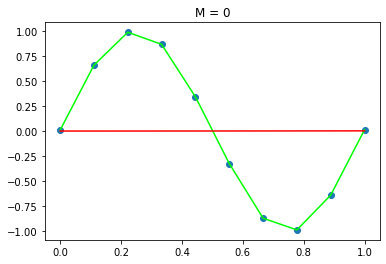

In [8]:
x_axis = np.linspace(0,1,10)
plt.title('M = 0')
plot1 = plt.scatter(x_data, y_data)
plt.plot(x_data, y_data, color='lime')
plot2 = plt.plot(x_axis, grado, color='red')
plt.show()

<b><div class="alert-success"> Degree 1</div>

progress: 0 w= 0.9786763640269944 loss= 0.9323327866676602
progress: 1 w= 0.9577589135223235 loss= 0.892375641555682
progress: 2 w= 0.9372338308798789 loss= 0.854018620791096
progress: 3 w= 0.9170879005062018 loss= 0.8171895104967395
progress: 4 w= 0.8973084760595107 loss= 0.7818201163207925
progress: 5 w= 0.8778834498008249 loss= 0.7478460013761309
progress: 6 w= 0.8588012238998526 loss= 0.7152062438242445
progress: 7 w= 0.8400506835515702 loss= 0.6838432124439101
progress: 8 w= 0.8216211717714249 loss= 0.6537023586806393
progress: 9 w= 0.8035024657479936 loss= 0.6247320238127199


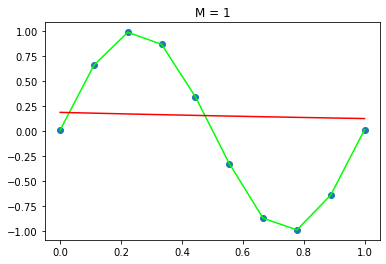

In [9]:
w = 1
weights = []
grado = []

for epoch in range(size):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        l = loss(x_val, y_val)
    print("progress:", epoch, "w=", w, "loss=", l)
    weights.append(w)  
    grado.append(grad)

x_axis = np.linspace(0,1,10)
plt.title('M = 1')
plot1 = plt.scatter(x_data, y_data)
plt.plot(x_data, y_data, color='lime')
plot2 = plt.plot(x_axis, grado, color='red')
plt.show()

<b><div class="alert-success"> Degree 3</div>

progress: 0 w= 2.913080036439626 loss= 8.409869410843397
progress: 1 w= 2.8301296359148274 loss= 7.935641592079512
progress: 2 w= 2.7508736924360493 loss= 7.49539081795831
progress: 3 w= 2.675061944321115 loss= 7.086027806905069
progress: 4 w= 2.602466228684149 loss= 6.704804250655038
progress: 5 w= 2.5328780923531125 loss= 6.349268774271527
progress: 6 w= 2.466106706347071 loss= 6.017229381740189
progress: 7 w= 2.4019770398245215 loss= 5.7067213190620985
progress: 8 w= 2.3403282565865973 loss= 5.415979480559342
progress: 9 w= 2.2810123031044958 loss= 5.143414639613615


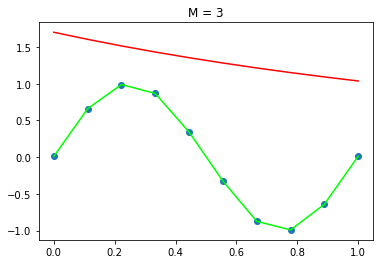

In [10]:
w = 3
weights = []
grado = []

for epoch in range(size):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        l = loss(x_val, y_val)
    print("progress:", epoch, "w=", w, "loss=", l)
    weights.append(w)  
    grado.append(grad)

x_axis = np.linspace(0,1,10)
plt.title('M = 3')
plot1 = plt.scatter(x_data, y_data)
plt.plot(x_data, y_data, color='lime')
plot2 = plt.plot(x_axis, grado, color='red')
plt.show()

<b><div class="alert-success"> Degree 9</div>

progress: 0 w= 8.404153089085042 loss= 70.40972911761254
progress: 1 w= 7.878928000141378 loss= 61.87120998221962
progress: 2 w= 7.412382298580357 loss= 54.74934076965101
progress: 3 w= 6.9951281227318 loss= 48.748681071765056
progress: 4 w= 6.619682746627332 loss= 43.6469018693785
progress: 5 w= 6.280007917148469 loss= 39.27410285699434
progress: 6 w= 5.971176845584526 loss= 35.49864928907796
progress: 7 w= 5.689129367371704 loss= 32.217280409966804
progress: 8 w= 5.430489162392482 loss= 29.348077687555588
progress: 9 w= 5.192425411294616 loss= 26.825385281859443


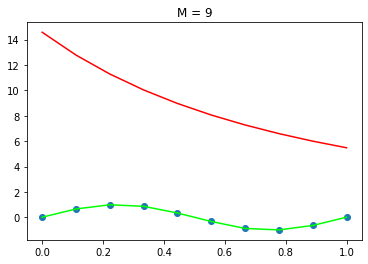

In [11]:
w = 9
weights = []
grado = []

for epoch in range(size):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        l = loss(x_val, y_val)
    print("progress:", epoch, "w=", w, "loss=", l)
    weights.append(w)  
    grado.append(grad)

x_axis = np.linspace(0,1,10)
plt.title('M = 9')
plot1 = plt.scatter(x_data, y_data)
plt.plot(x_data, y_data, color='lime')
plot2 = plt.plot(x_axis, grado, color='red')
plt.show()

### Best model according to me is M=9

### Although I couldn't complete the assignment successfully, from what I have learnt & from what I have been taught in class, Model with degree of 9 is the best performing model when working with more number of data but tends to overfit with less amount of data.